In [427]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [41]:
hearthstone = pd.read_csv('data.csv')

In [65]:
card0 = hearthstone[['date', 'card_0']].copy()
card0['date'] = pd.to_datetime(card0.date)
card0 = card0.rename(index=str, columns={"card_0": "cards"})

In [85]:
card0['month_year'] = card0['date'].apply(lambda x: "%d/%d" % (x.month, x.year))

In [180]:
df = card0.groupby(['month_year', 'cards']).size()

In [223]:
df = card0.groupby(['month_year', 'cards']).size().to_frame(name = 'count').reset_index()
# df = DataFrame({'count' : card0.groupby( ['month_year', 'cards'] ).size()}).reset_index()
# print(df.head())

# def getOccurance(cardID):
#     arrMonth = []
#     arrCount = []
#     for i in range(len(df['cards'])):
#         if df['cards'][i] == cardID:
#             arrMonth.append(df['month_year'][i])
#             arrCount.append(df['count'][i])
#     arrMonth = pd.to_datetime(arrMonth)
#     y = pd.DataFrame({'month_year': arrMonth, 'frequency': arrCount})
#     return(y)

c0Popularity = getOccurance(64)

In [221]:
print(c0Popularity)

   month_year  frequency
0  2017-01-01         11
1  2015-10-01          1
2  2016-10-01          5
3  2015-11-01          2
4  2016-11-01         39
5  2014-12-01          1
6  2016-12-01         40
7  2016-02-01          1
8  2017-02-01          5
9  2016-03-01          3
10 2016-04-01         11
11 2016-05-01          5
12 2016-06-01          2
13 2016-07-01          4
14 2015-08-01          2
15 2016-08-01          6
16 2015-09-01          1
17 2016-09-01         16


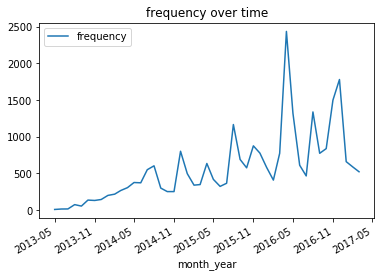

In [238]:
c0Popularity.plot(x='month_year', y='frequency', title='frequency over time')

In [208]:
def mostPopular(df):
    allCards = []
    for i in range(11, 40):
        for o in range(len(df['card_0'])):
            allCards.append(df[df.columns[i]][o])
    return allCards
            

cards = mostPopular(hearthstone)
# hearthstone[hearthstone.columns[40]]


KeyboardInterrupt



In [213]:
allCards = pd.DataFrame({'allCards': cards})

In [214]:
allCards.mode()

,allCards
0,825


In [292]:
def twoColumn(df): 
    everyCard = []
    everyDate = []
    for i in range (11, 40):
        for p in range (len(df['date'])):
            if (p%2 == 0):
                everyCard.append(df[df.columns[i]][p])
                everyDate.append(df['date'][p])
    cardsAndDates = pd.DataFrame({'everyCard': everyCard, 'everyDate': everyDate})
    return(cardsAndDates)

twoColumn = twoColumn(hearthstone)

In [293]:
twoColumn['everyDate'] = pd.to_datetime(twoColumn.everyDate)
twoColumn['month_year'] = twoColumn['everyDate'].apply(lambda x: "%d/%d" % (x.month, x.year))

In [294]:
twoColumn = twoColumn.groupby(['month_year', 'everyCard']).size().to_frame(name = 'count').reset_index() 

In [425]:
def getOccurance(cardID):
    arrMonth = []
    arrCount = []
    for i in range(len(twoColumn['everyCard'])):
        if twoColumn['everyCard'][i] == cardID:
            arrMonth.append(twoColumn['month_year'][i])
            arrCount.append(twoColumn['count'][i])
    arrMonth = pd.to_datetime(arrMonth)
    y = pd.DataFrame({'month_year': arrMonth, 'frequency': arrCount})
    return(y)

popularity = getOccurance(825)

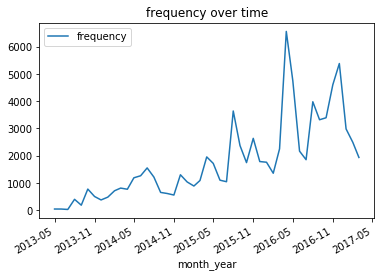

In [339]:
popularity.plot(x='month_year', y='frequency', title='frequency over time')

In [359]:
scatter = popularity.copy()
scatter.dtypes

month_year    datetime64[ns]
frequency              int64
dtype: object

In [407]:
def numberDate(df):
    x = 0
    numberDate = []
    for i in range(len(df['month_year'])):
        x = ((df['month_year'][i].year*365) + (df['month_year'][i].month*30))
        numberDate.append(float(x/365))
    return(numberDate)

dayFromZero = numberDate(scatter)

In [410]:
c0popNumber = numberDate(c0Popularity)
c0Popularity['dateInt'] = c0popNumber

In [390]:
scatter["dayFromZero"] = dayFromZero

In [ ]:
fit1 = np.polyfit(scatter.dayFromZero, scatter.frequency, 1)
fit_fn1 = np.poly1d(fit)

# fit2 = np.polyfit(c0Popularity.dateInt, c0Popularity.frequency, 1)
# fit_fn2 = np.poly1d(fit)

r_x1, r_y1 = zip(*((i, i*fit[0] + fit[1]) for i in scatter.dayFromZero))

# r_x2, r_y2 = zip(*((i, i*fit[0] + fit[1]) for i in c0Popularity.dateInt))

fit_plot1 = pd.DataFrame({
    'dayFromZero' : r_x1,
    'frequency' : r_y1
})
# fit_plot2 = pd.DataFrame({
#     'dateInt' : r_x2,
#     'frequency' : r_y2
# })

fig, axes = plt.subplots()
 
scatter.plot(x='dayFromZero', y='frequency', kind="scatter", ax = axes, title='Frequency Over Time')
fit_plot1.plot(x='dayFromZero', y='frequency', kind='line', ax = axes, color = 'purple')

# c0Popularity.plot(x='dateInt', y='frequency', kind="scatter", ax = axes, color = 'red')
# fit_plot2.plot(x='dateInt', y='frequency', kind='line', ax = axes, color = 'red')


plt.show()

%matplotlib inline

In [405]:
def ranked(df):
    ranked = pd.DataFrame()
    for i in range(len(df['deck_type'])):
        if (df['deck_type'][i] == 'Ranked Deck'):
            ranked.append(df.iloc[i])
    return ranked

In [431]:
# ranked = ranked(hearthstone)


TypeError: cannot concatenate object of type "<class 'int'>"; only pd.Series, pd.DataFrame, and pd.Panel (deprecated) objs are valid

In [423]:
linregress(scatter['dayFromZero'], scatter['frequency'])

LinregressResult(slope=993.5012062443856, intercept=-2000459.4101360901, rvalue=0.7675494919117595, pvalue=3.0894477414159357e-10, stderr=123.6820841047662)